# Loading the Dataset

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Reading The CSV
data=pd.read_csv('crime.csv',engine='python')

#Displaying the column names and their info for the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
INCIDENT_NUMBER        327820 non-null object
OFFENSE_CODE           327820 non-null int64
OFFENSE_CODE_GROUP     327820 non-null object
OFFENSE_DESCRIPTION    327820 non-null object
DISTRICT               326046 non-null object
REPORTING_AREA         327820 non-null object
SHOOTING               1055 non-null object
OCCURRED_ON_DATE       327820 non-null object
YEAR                   327820 non-null int64
MONTH                  327820 non-null int64
DAY_OF_WEEK            327820 non-null object
HOUR                   327820 non-null int64
UCR_PART               327727 non-null object
STREET                 316843 non-null object
Lat                    307188 non-null float64
Long                   307188 non-null float64
Location               327820 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 42.5+ MB


In [34]:
#Profiling to Analyse the data set

import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,17
Number of observations,327820
Total Missing (%),6.8%
Total size in memory,42.5 MiB
Average record size in memory,136.0 B
Numeric,6
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Data Cleaning and Pre Processing

In [36]:
#Finding Missing Values

data['SHOOTING'].unique()


array([nan, 'Y'], dtype=object)

In [37]:
#Replacing Shooting Null Values with N

data['SHOOTING']=data['SHOOTING'].fillna('N')
data['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [38]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [39]:

data['Location'].isnull().sum()


0

In [40]:
data['Lat'].isnull().sum()

20632

In [41]:
data['Long'].isnull().sum()

20632

In [43]:
data['Lat']=data['Lat'].fillna(0)

In [44]:
data['Long']=data['Long'].fillna(0)

In [45]:
data['Lat'].isnull().sum()

0

In [48]:
data['Long'].isnull().sum()

0

In [49]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,N,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,N,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,N,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,N,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,N,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


# Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001991C196278>,
      dtype=object)

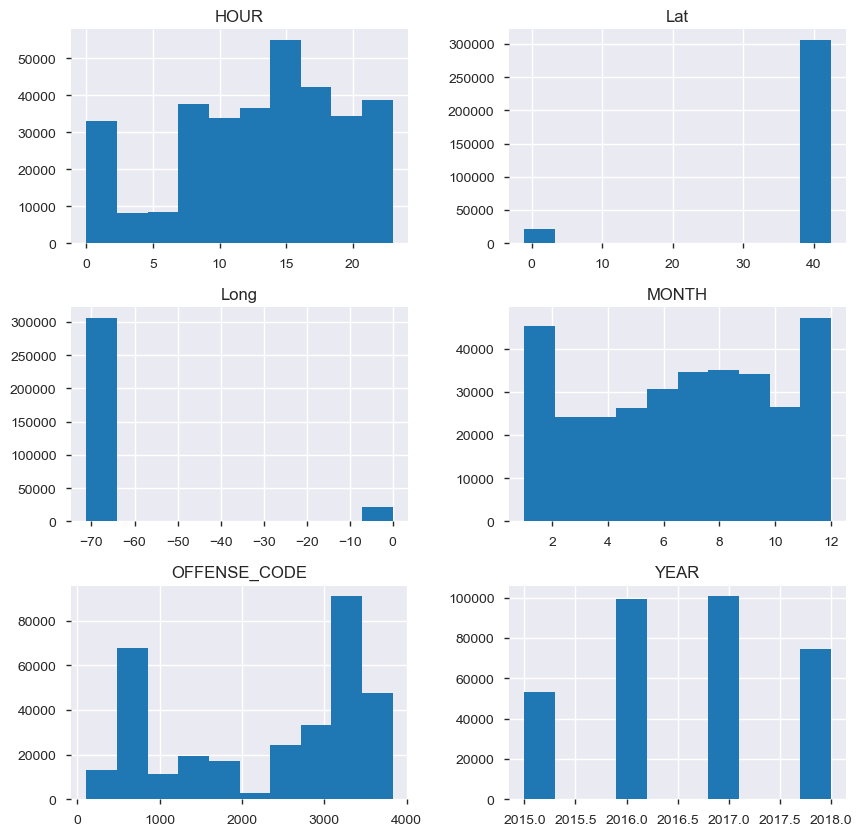

In [50]:
data.hist(figsize=(10,10))

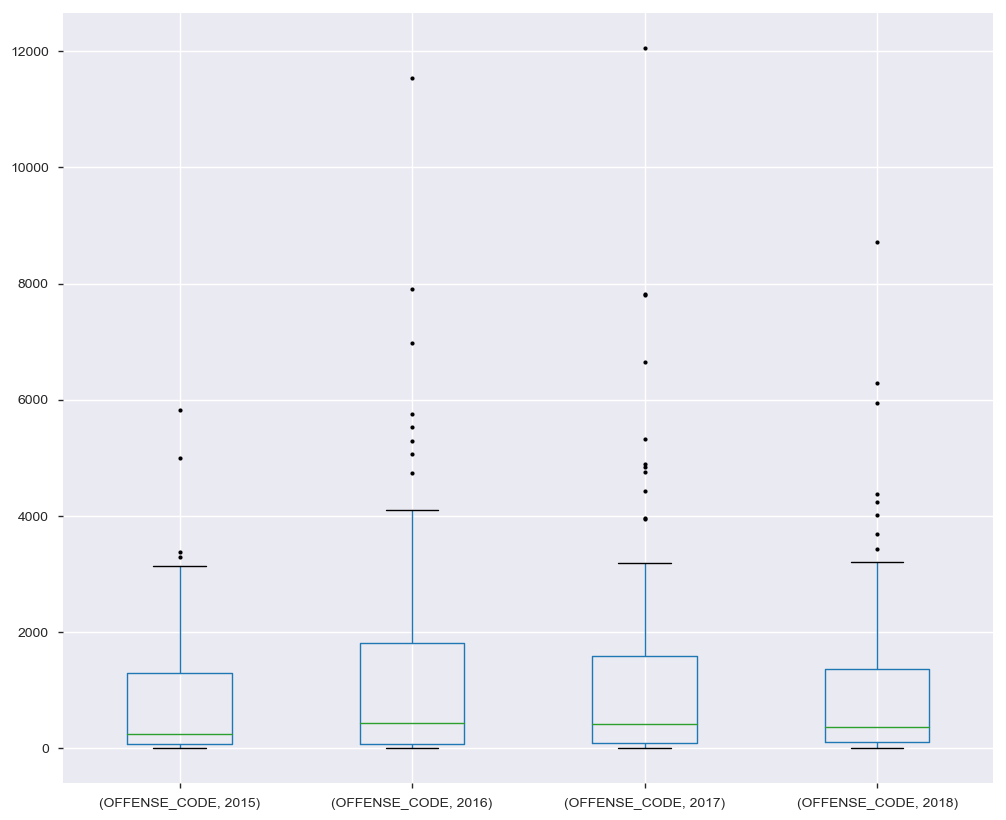

In [52]:
#BoxPlots to Display Outliers

#Ten Most Frequent Offenses in Boston

offense=pd.pivot_table(data.loc[:,['OFFENSE_CODE_GROUP','YEAR','OFFENSE_CODE']],index='OFFENSE_CODE_GROUP', columns='YEAR',aggfunc=np.count_nonzero)

box = offense.boxplot(grid=True, figsize=(12,10), return_type='axes', sym='k.')
